### 75.06/95.58 Organización de Datos: Trabajo Práctico 1 ###
#### Primer Cuatrimestre de 2020 ####



In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

tweets = pd.read_csv('train.csv') 
tweets.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
tweets['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [11]:
tweets['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [12]:
tweets['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [13]:
duplicados = tweets.duplicated(subset = 'text', keep = False)
duplicados.value_counts()

False    7434
True      179
dtype: int64

In [14]:
tweets.drop_duplicates(subset = 'text', keep = False, inplace = True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7434 non-null   int64 
 1   keyword   7378 non-null   object
 2   location  4982 non-null   object
 3   text      7434 non-null   object
 4   target    7434 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 348.5+ KB


TOP 50 DESASTRES COMENTADOS EN LOS TWEETS

In [15]:
desastres = tweets.groupby("keyword").agg({"target":["count","mean"]}).copy()
level0 = desastres.columns.get_level_values(0)
level1 = desastres.columns.get_level_values(1)
desastres.columns = level0 + "_" + level1
desastres.sort_values(by="target_count",ascending = False,inplace = True)
desastres = desastres.head(50) #TOP 50

[]

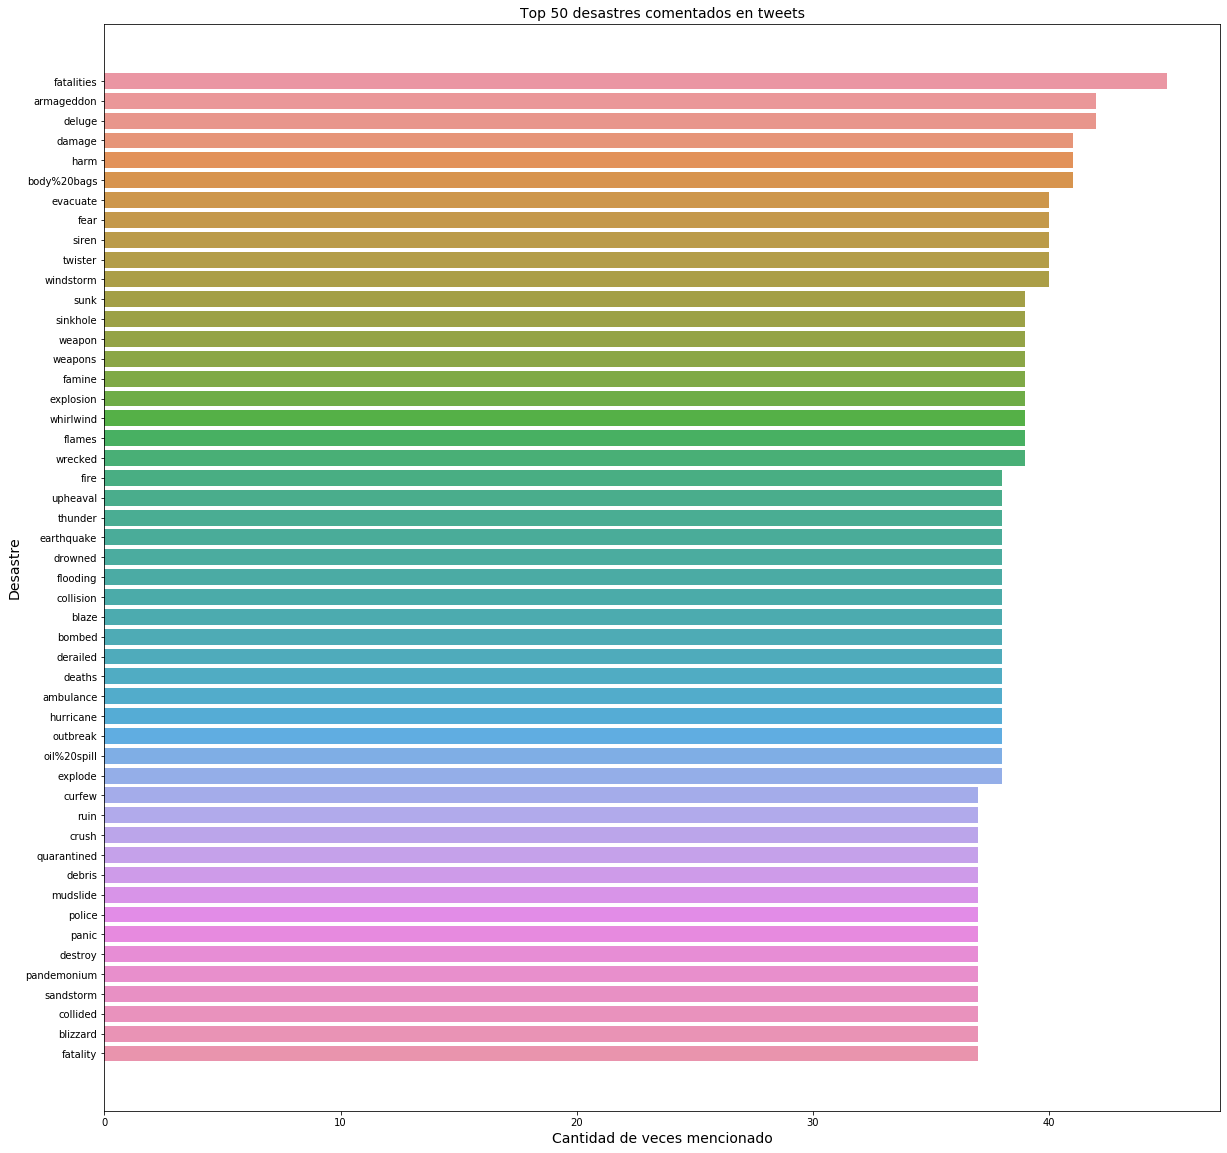

In [16]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = desastres,x = "target_count",y = desastres.index)
grafico.set_title("Top 50 desastres comentados en tweets",fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado",fontsize = 14)
grafico.set_ylabel("Desastre",fontsize = 14)
grafico.plot()

In [17]:
#
tweets['hashtags'] = tweets['text'].str.findall(r'#.*?(?=\s|$)')
tweets_hashtags = tweets.explode('hashtags')
tweets_hashtags.head(25)


,id,keyword,location,text,target,hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,#earthquake
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,NaN
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,#wildfires
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,#Alaska
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,#wildfires
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#RockyFire
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#CAfire
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#wildfires
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,#flood


In [18]:
hashtags = tweets_hashtags.groupby('hashtags').agg({'target':['count','mean']})
hashtags.sort_values(by=("target","count"),ascending = False,inplace = True)
hashtags[("target","mean")] = (hashtags[("target","mean")]*100).round()
hashtags = hashtags.head(50).reset_index()
hashtags.head(5)

hashtags target      
              count  mean
0      #News     37  86.0
1      #news     36  58.0
2      #best     30  43.0
3  #prebreak     30  43.0
4       #hot     30  43.0

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


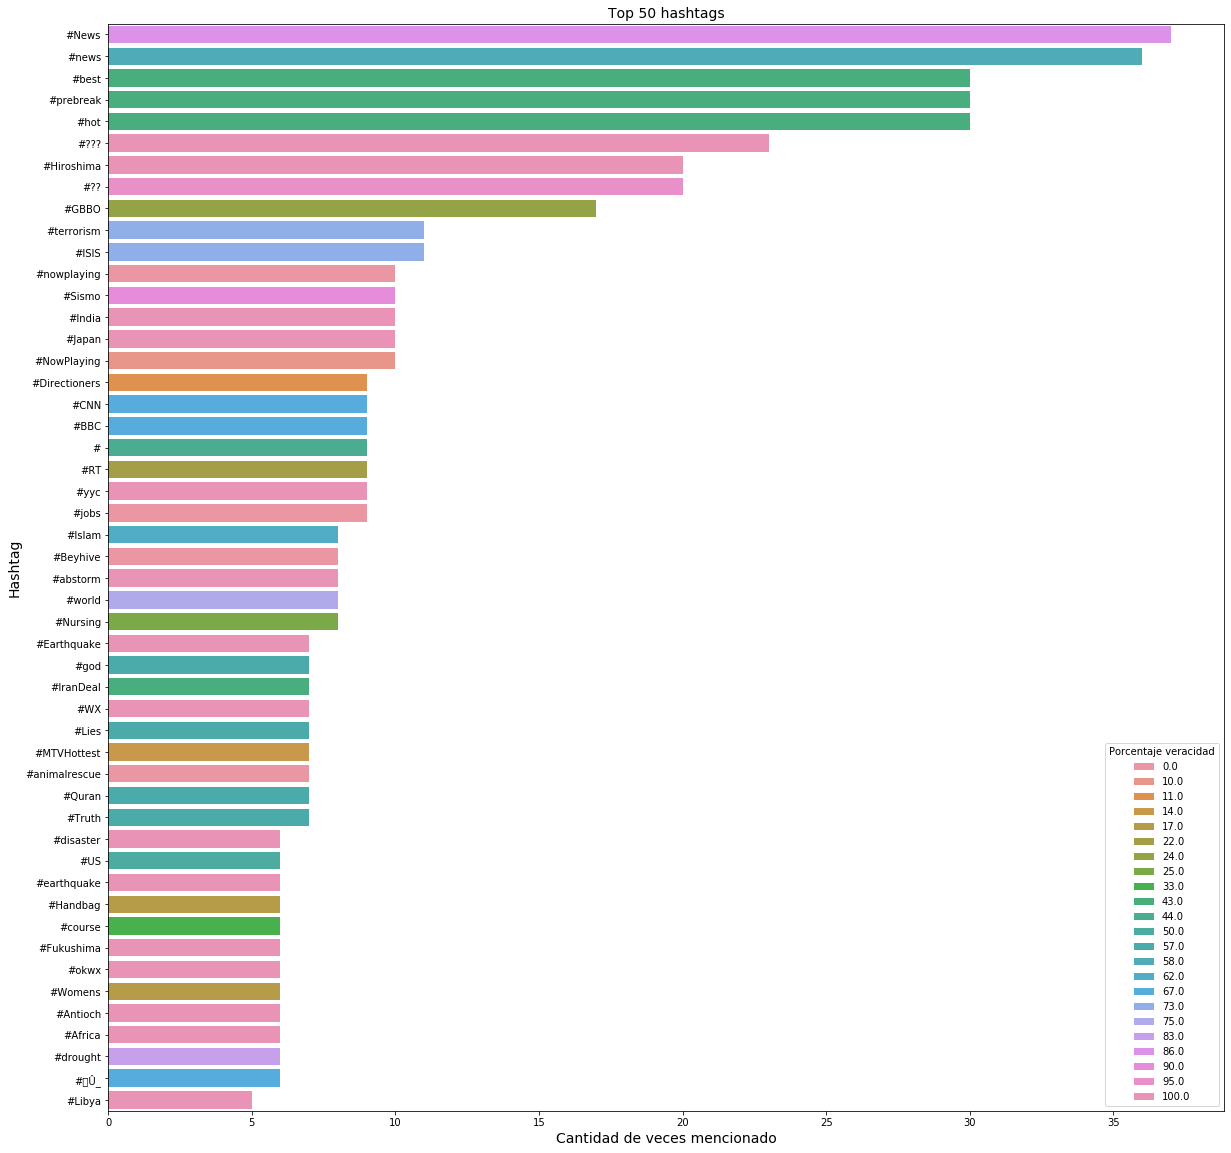

In [19]:

fig = plt.figure(figsize = (20, 20))
palette = sns.dark_palette("muted purple", input="xkcd")
grafico = sns.barplot(data = hashtags, x = ("target","count"), y = 'hashtags', hue = ('target','mean'), dodge = False)#, hue = ('target','mean'), palette = palette, dodge = False
grafico.set_title("Top 50 hashtags", fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado", fontsize = 14)
grafico.set_ylabel("Hashtag", fontsize = 14)
plt.legend(title='Porcentaje veracidad', loc='lower right')
plt.show(grafico)

In [20]:
tweets_locations = tweets[tweets['text'].str.contains(str(tweets['location']))]
tweets_locations

,id,keyword,location,text,target,hashtags


In [21]:
tweets.groupby('keyword').size().nlargest(20)

keyword
fatalities     45
armageddon     42
deluge         42
body%20bags    41
damage         41
harm           41
evacuate       40
fear           40
siren          40
twister        40
windstorm      40
explosion      39
famine         39
flames         39
sinkhole       39
sunk           39
weapon         39
weapons        39
whirlwind      39
wrecked        39
dtype: int64

In [22]:
#Falta filtrar por target
tweets.dropna(subset = ['location', 'keyword'], inplace= True)
locations = tweets.groupby(['location', 'keyword']).size().nlargest(50)
locations = locations.reset_index()
col_rename = {0 : 'keyword_count'}
locations = locations.rename(columns = col_rename)
locations.drop_duplicates(subset = 'location',keep = 'first', inplace = True)
locations

,location,keyword,keyword_count
0,USA,sandstorm,17
1,Kenya,loud%20bang,16
2,New York,flood,13
4,ss,arsonist,10
5,304,aftershock,9
6,Mumbai,wreckage,9
8,Road to the Billionaires Club,derail,6
9,Everywhere,crush,5
10,India,derailment,5
11,"Washington, DC",derailed,5


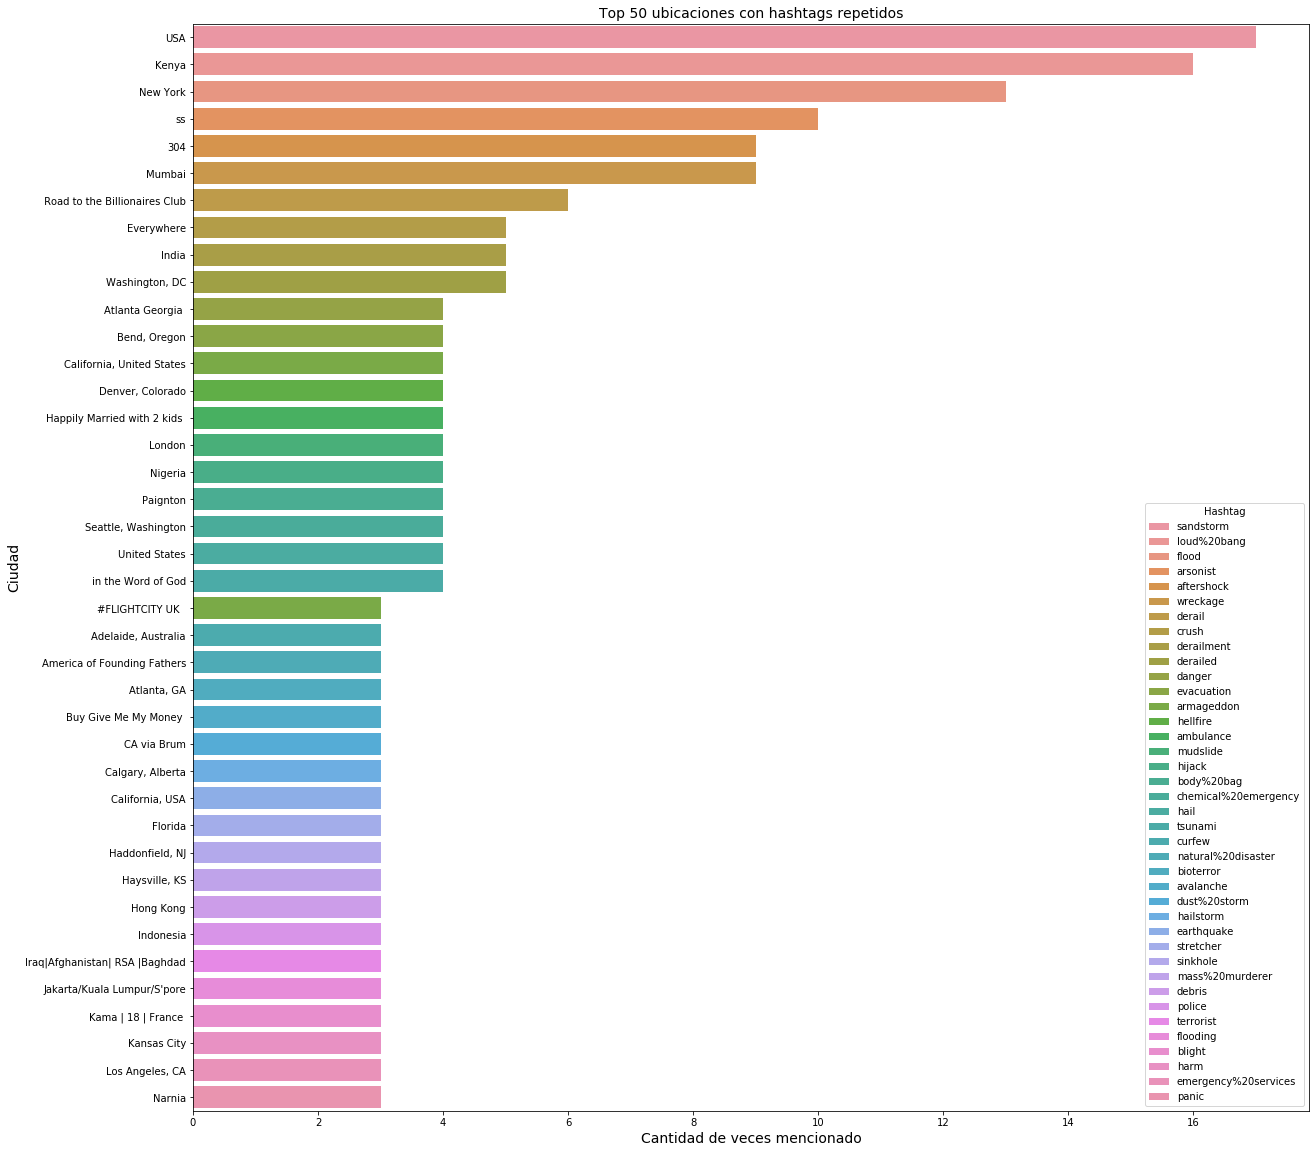

In [23]:
fig = plt.figure(figsize = (20, 20))
#palette = sns.dark_palette("muted purple", input="xkcd")
grafico = sns.barplot(data = locations, x = 'keyword_count', y = 'location', hue = 'keyword', dodge = False)#, hue = ('target','mean'), palette = palette, dodge = False
grafico.set_title("Top 50 ubicaciones con hashtags repetidos", fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado", fontsize = 14)
grafico.set_ylabel("Ciudad", fontsize = 14)
plt.legend(title='Hashtag', loc='lower right')
plt.show(grafico)

In [24]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="que_te_importa")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
locations['location'] = locations['location'].apply(geocode)
locations

,location,keyword,keyword_count
0,"(United States, (39.7837304, -100.4458825))",sandstorm,17
1,"(Kenya, (1.4419683, 38.4313975))",loud%20bang,16
2,"(New York, United States of America, (40.71272...",flood,13
4,"(Sassari, Sardegna, Italia, (40.77780040000000...",arsonist,10
5,"(Kustavi, Vakka-Suomen seutukunta, Varsinais-S...",aftershock,9
6,"(Mumbai, Mumbai City, Maharashtra, India, (18....",wreckage,9
8,None,derail,6
9,"(Narrow path - thorn everywhere, Sântelec, Bih...",crush,5
10,"(भारत - India, (22.3511148, 78.6677428))",derailment,5
11,"(Washington, District of Columbia, 20500, Unit...",derailed,5


In [95]:
from shapely.geometry import Point

locations['point'] = locations['location'].apply(lambda loc: (loc.longitude, loc.latitude) if loc else None)
locations = locations.replace(to_replace='None', value=np.nan).dropna()
locations['point'] = locations['point'].apply(Point)

locations

,location,keyword,keyword_count,point
0,"(United States, (39.7837304, -100.4458825))",sandstorm,17,POINT (-100.4458825 39.7837304)
1,"(Kenya, (1.4419683, 38.4313975))",loud%20bang,16,POINT (38.4313975 1.4419683)
2,"(New York, United States of America, (40.71272...",flood,13,POINT (-74.00601519999999 40.7127281)
4,"(Sassari, Sardegna, Italia, (40.77780040000000...",arsonist,10,POINT (8.921996955790174 40.7778004)
5,"(Kustavi, Vakka-Suomen seutukunta, Varsinais-S...",aftershock,9,POINT (21.3558051 60.5458493)
6,"(Mumbai, Mumbai City, Maharashtra, India, (18....",wreckage,9,POINT (72.8353355 18.9387711)
9,"(Narrow path - thorn everywhere, Sântelec, Bih...",crush,5,POINT (22.0541733 46.9599823)
10,"(भारत - India, (22.3511148, 78.6677428))",derailment,5,POINT (78.6677428 22.3511148)
11,"(Washington, District of Columbia, 20500, Unit...",derailed,5,POINT (-77.03657080000001 38.8949855)
12,"(Atlanta, Fulton County, Georgia, United State...",danger,4,POINT (-84.39018489999999 33.7490987)


[]

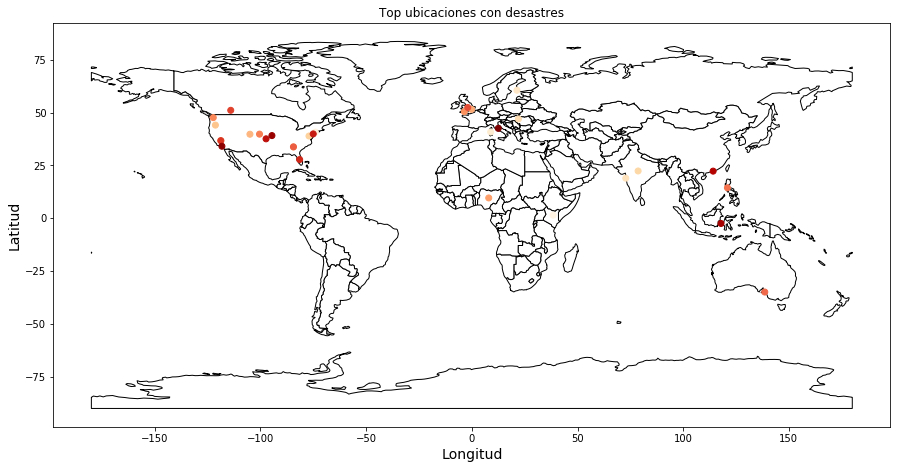

In [96]:
import geopandas as gpd

locations['point'].apply(Point)
mapa = gpd.GeoDataFrame(locations, geometry='point')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white',edgecolor='black', figsize = (15, 20))

grafico = mapa.plot(ax=ax, cmap='OrRd', legend=True)
grafico.axes.set_title('Top ubicaciones con desastres')
grafico.set_xlabel("Longitud", fontsize = 14)
grafico.set_ylabel("Latitud", fontsize = 14)
grafico.plot()